In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam

In [2]:
cancer_dataset = pd.read_csv('../Dataset/data.csv')

In [3]:
cancer_dataset = cancer_dataset.dropna(thresh=cancer_dataset.shape[1]-9, axis=0)

In [4]:
cancer_dataset.replace({'diagnosis': {'B':0, 'M':1}}, inplace=True)

In [5]:
cancer_dataset = cancer_dataset.drop(columns='id', axis=1)

In [6]:
cancer_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
cancer_dataset = cancer_dataset.drop(columns='Unnamed: 32', axis=1)

In [8]:
cancer_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
cancer_dataset.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [10]:
X = cancer_dataset.drop(columns='diagnosis', axis=1)
Y = cancer_dataset['diagnosis']

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score'))

                Specs          Score
23         area_worst  112598.431564
3           area_mean   53991.655924
13            area_se    8758.504705
22    perimeter_worst    3665.035416
2      perimeter_mean    2011.102864
20       radius_worst     491.689157
0         radius_mean     266.104917
12       perimeter_se     250.571896
21      texture_worst     174.449400
1        texture_mean      93.897508
26    concavity_worst      39.516915
10          radius_se      34.675247
6      concavity_mean      19.712354
25  compactness_worst      19.314922


In [13]:
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst']

In [14]:
len(columns)

14

In [15]:
X_new = pd.DataFrame(cancer_dataset, columns=columns)

In [16]:
X_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst
0,17.99,10.38,122.80,1001.0,0.3001,1.0950,8.589,153.40,25.38,17.33,184.60,2019.0,0.6656,0.7119
1,20.57,17.77,132.90,1326.0,0.0869,0.5435,3.398,74.08,24.99,23.41,158.80,1956.0,0.1866,0.2416
2,19.69,21.25,130.00,1203.0,0.1974,0.7456,4.585,94.03,23.57,25.53,152.50,1709.0,0.4245,0.4504
3,11.42,20.38,77.58,386.1,0.2414,0.4956,3.445,27.23,14.91,26.50,98.87,567.7,0.8663,0.6869
4,20.29,14.34,135.10,1297.0,0.1980,0.7572,5.438,94.44,22.54,16.67,152.20,1575.0,0.2050,0.4000


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.2, random_state = 1, stratify=Y)

In [18]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(569, 30)
(455, 14)
(114, 14)
(455,)
(114,)


In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
x_train = x_train.reshape(455, 14, 1)
x_test = x_test.reshape(114, 14, 1)

In [28]:
epochs = 100
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(14,1)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv1D(filters=16, kernel_size=2, activation='relu',))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu',))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu',))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [29]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 400
EPOCHS = 50

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 13, 16)            48        
                                                                 
 conv1d_5 (Conv1D)           (None, 12, 16)            528       
                                                                 
 conv1d_6 (Conv1D)           (None, 11, 16)            528       
                                                                 
 conv1d_7 (Conv1D)           (None, 10, 16)            528       
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                5152      
                                                                 
 dropout_1 (Dropout)         (None, 32)               

In [31]:
model.compile(optimizer=Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    #callbacks=callbacks_list, 
                    validation_data = (x_test, y_test),
                    verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 12ms/step - loss: 0.4004 - accuracy: 0.8549 - val_loss: 0.2164 - val_accuracy: 0.9386
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1756 - accuracy: 0.9451 - val_loss: 0.1094 - val_accuracy: 0.9561
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.9495 - val_loss: 0.1125 - val_accuracy: 0.9474
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1117 - accuracy: 0.9670 - val_loss: 0.1409 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9495 - val_loss: 0.1213 - val_accuracy: 0.9386
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1098 - accuracy: 0.9648 - val_loss: 0.1221 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1167 - accuracy: 0.9582 - val_loss: 0.1398 - val_accuracy: 0.9561
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9912 - val_loss: 0.2997 - val_accuracy: 0.9211
Epoch 60/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.3159 - val_accuracy: 0.9211
Epoch 61/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9934 - val_loss: 0.3142 - val_accuracy: 0.9211
Epoch 62/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 0.3695 - val_accuracy: 0.9123
Epoch 63/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9912 - val_loss: 0.3999 - val_accuracy: 0.9035
Epoch 64/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.3910 - val_accuracy: 0.9123
Epoch 65/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9978 - val_loss: 0.4285 - val_accuracy: 0.9211
Epoch 

In [33]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.9298


[0.3278079330921173, 0.9298245906829834]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


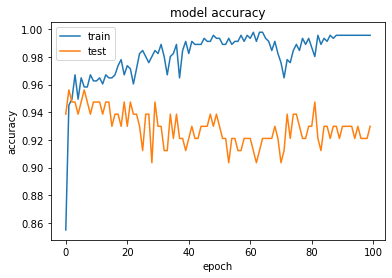

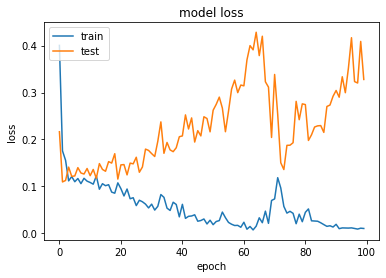

In [35]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
X_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst
0,17.99,10.38,122.80,1001.0,0.3001,1.0950,8.589,153.40,25.38,17.33,184.60,2019.0,0.6656,0.7119
1,20.57,17.77,132.90,1326.0,0.0869,0.5435,3.398,74.08,24.99,23.41,158.80,1956.0,0.1866,0.2416
2,19.69,21.25,130.00,1203.0,0.1974,0.7456,4.585,94.03,23.57,25.53,152.50,1709.0,0.4245,0.4504
3,11.42,20.38,77.58,386.1,0.2414,0.4956,3.445,27.23,14.91,26.50,98.87,567.7,0.8663,0.6869
4,20.29,14.34,135.10,1297.0,0.1980,0.7572,5.438,94.44,22.54,16.67,152.20,1575.0,0.2050,0.4000


In [37]:
input_data = (17.99, 10.38, 122.8, 1001, 0.3001, 1.0950, 8.589, 153.40, 153.40, 17.33, 184.60, 2019, 0.6656, 0.7119)

In [38]:
input_data_as_numpy_array = np.asarray(input_data)

In [39]:
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

In [40]:
std_data = scaler.transform(input_data_reshape)

In [41]:
prediction = model.predict(std_data)

In [42]:
if prediction[0]<=0.5:
    print("Benign")
else:
    print("Malignant")

Malignant


In [43]:
prediction

array([[1.]], dtype=float32)

In [44]:
model.save("model.h5")

# Saving the trained model

In [45]:
loaded_model = keras.models.load_model('model.h5')

In [46]:
input_data = (13.54, 14.36, 87.46, 566.3, 0.0664, 0.2699, 2.058, 23.56, 15.11, 19.26, 99.7, 711.2, 0.1773, 0.239)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshape)

prediction = loaded_model.predict(std_data)

if prediction[0]<=0.5:
    print("Benign")
else:
    print("Malignant")

Benign
